## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


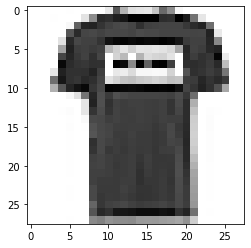

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8363 - accuracy: 0.7267 - val_loss: 0.5432 - val_accuracy: 0.8153


Epoch 2/25


60/60 - 1s - loss: 0.4981 - accuracy: 0.8318 - val_loss: 0.4695 - val_accuracy: 0.8397


Epoch 3/25


60/60 - 1s - loss: 0.4443 - accuracy: 0.8480 - val_loss: 0.4341 - val_accuracy: 0.8488


Epoch 4/25


60/60 - 1s - loss: 0.4089 - accuracy: 0.8586 - val_loss: 0.4091 - val_accuracy: 0.8585


Epoch 5/25


60/60 - 1s - loss: 0.3855 - accuracy: 0.8666 - val_loss: 0.3949 - val_accuracy: 0.8637


Epoch 6/25


60/60 - 1s - loss: 0.3698 - accuracy: 0.8715 - val_loss: 0.3890 - val_accuracy: 0.8660


Epoch 7/25


60/60 - 1s - loss: 0.3536 - accuracy: 0.8756 - val_loss: 0.3786 - val_accuracy: 0.8680


Epoch 8/25


60/60 - 1s - loss: 0.3415 - accuracy: 0.8806 - val_loss: 0.3674 - val_accuracy: 0.8671


Epoch 9/25


60/60 - 1s - loss: 0.3351 - accuracy: 0.8813 - val_loss: 0.3502 - val_accuracy: 0.8771


Epoch 10/25


60/60 - 1s - loss: 0.3197 - accuracy: 0.8868 - val_loss: 0.3628 - val_accuracy: 0.8702


Epoch 11/25


60/60 - 1s - loss: 0.3094 - accuracy: 0.8898 - val_loss: 0.3433 - val_accuracy: 0.8811


Epoch 12/25


60/60 - 1s - loss: 0.2977 - accuracy: 0.8953 - val_loss: 0.3379 - val_accuracy: 0.8785


Epoch 13/25


60/60 - 1s - loss: 0.2921 - accuracy: 0.8961 - val_loss: 0.3351 - val_accuracy: 0.8798


Epoch 14/25


60/60 - 1s - loss: 0.2820 - accuracy: 0.8990 - val_loss: 0.3258 - val_accuracy: 0.8831


Epoch 15/25


60/60 - 1s - loss: 0.2795 - accuracy: 0.8992 - val_loss: 0.3279 - val_accuracy: 0.8825


Epoch 16/25


60/60 - 1s - loss: 0.2727 - accuracy: 0.9022 - val_loss: 0.3204 - val_accuracy: 0.8876


Epoch 17/25


60/60 - 1s - loss: 0.2665 - accuracy: 0.9045 - val_loss: 0.3452 - val_accuracy: 0.8752


Epoch 18/25


60/60 - 1s - loss: 0.2651 - accuracy: 0.9038 - val_loss: 0.3215 - val_accuracy: 0.8873


Epoch 19/25


60/60 - 1s - loss: 0.2573 - accuracy: 0.9076 - val_loss: 0.3142 - val_accuracy: 0.8890


Epoch 20/25


60/60 - 1s - loss: 0.2507 - accuracy: 0.9102 - val_loss: 0.3130 - val_accuracy: 0.8897


Epoch 21/25


60/60 - 1s - loss: 0.2459 - accuracy: 0.9120 - val_loss: 0.3149 - val_accuracy: 0.8878


Epoch 22/25


60/60 - 1s - loss: 0.2402 - accuracy: 0.9142 - val_loss: 0.3073 - val_accuracy: 0.8902


Epoch 23/25


60/60 - 1s - loss: 0.2397 - accuracy: 0.9145 - val_loss: 0.3108 - val_accuracy: 0.8884


Epoch 24/25


60/60 - 1s - loss: 0.2317 - accuracy: 0.9166 - val_loss: 0.3106 - val_accuracy: 0.8889


Epoch 25/25


60/60 - 1s - loss: 0.2290 - accuracy: 0.9180 - val_loss: 0.3076 - val_accuracy: 0.8891


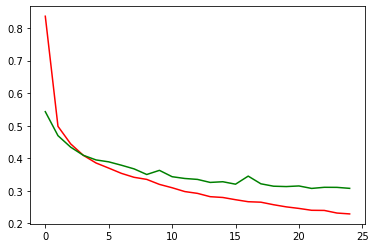

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

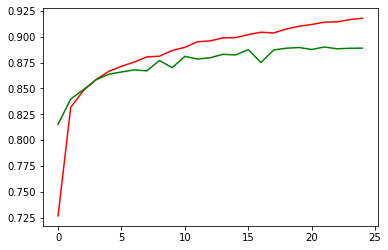

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.3276 - accuracy: 0.8750



 29/313 [=>............................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8901

 60/313 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8901

 91/313 [=======>......................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8887

122/313 [==========>...................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8824



154/313 [=============>................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8815

186/313 [================>.............] - ETA: 0s - loss: 0.3463 - accuracy: 0.8799

218/313 [===================>..........] - ETA: 0s - loss: 0.3439 - accuracy: 0.8807

250/313 [======================>.......] - ETA: 0s - loss: 0.3362 - accuracy: 0.8824

283/313 [==========================>...] - ETA: 0s - loss: 0.3350 - accuracy: 0.8830

312/313 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.8834

313/313 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8834


準確度 = 88.3
